Python Programlama Dili ile YZ Bulanık Mantık Tabanlı Komisyon (Bahşiş) Belirleme Uygulamasının Gerçekleştirilmesi

Python programlama dilinde; Bulanık mantık işlemlerini "scikit-fuzzy" ile gerçekleştirilmektedir.

In [1]:
print("Merhaba, İGÜ - YAPAY ZEKA")

Merhaba, İGÜ - YAPAY ZEKA


In [2]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/YapayZeka')
!pwd

/content/drive/MyDrive/YapayZeka


In [6]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00


In [9]:
import sys
import pandas as pd
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print("Python sürüm no: ",sys.version)
print("Pandas sürüm no: ", pd.__version__)
print("Matplotlib version: ", matplotlib.__version__)
print("Skfuzzy version: ", fuzz.__version__)
print("Numpy version no: ", np.__version__)

Python sürüm no:  3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Pandas sürüm no:  2.2.2
Matplotlib version:  3.7.1
Skfuzzy version:  0.5.0
Numpy version no:  1.26.4


In [11]:
servis = np.arange(1,11,1)
yemek = np.arange(0,11,1)
bahsis = np.arange(0,101,1)

In [12]:
SKK = fuzz.trimf(servis, [0,0,5])
SKO = fuzz.trimf(servis, [0,5,10])
SKI = fuzz.trimf(servis, [5,10,10])

In [13]:
YK = fuzz.trimf(yemek, [0,0,5])
YO = fuzz.trimf(yemek, [0,5,10])
YI = fuzz.trimf(yemek, [5,10,10])

In [14]:
BCK = fuzz.trimf(bahsis, [0,0,30])
BK = fuzz.trimf(bahsis, [20,35,50])
BO = fuzz.trimf(bahsis, [40,55,70])
BI = fuzz.trimf(bahsis, [60,70,80])
BCI = fuzz.trimf(bahsis, [70,100,100])

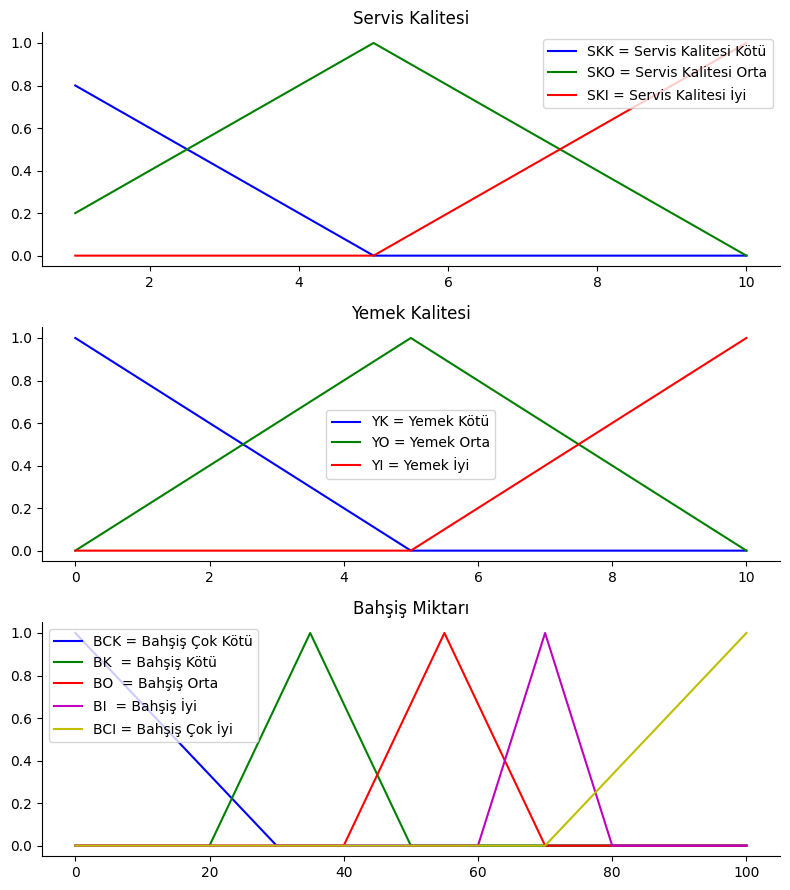

In [15]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(servis, SKK, 'b', linewidth=1.5, label='SKK = Servis Kalitesi Kötü')
ax0.plot(servis, SKO, 'g', linewidth=1.5, label='SKO = Servis Kalitesi Orta')
ax0.plot(servis, SKI, 'r', linewidth=1.5, label='SKI = Servis Kalitesi İyi')
ax0.set_title('Servis Kalitesi')
ax0.legend()

ax1.plot(yemek, YK, 'b', linewidth=1.5, label='YK = Yemek Kötü')
ax1.plot(yemek, YO, 'g', linewidth=1.5, label='YO = Yemek Orta')
ax1.plot(yemek, YI, 'r', linewidth=1.5, label='YI = Yemek İyi')
ax1.set_title('Yemek Kalitesi')
ax1.legend()

ax2.plot(bahsis, BCK, 'b', linewidth=1.5, label='BCK = Bahşiş Çok Kötü')
ax2.plot(bahsis, BK, 'g',  linewidth=1.5, label='BK  = Bahşiş Kötü')
ax2.plot(bahsis, BO, 'r',  linewidth=1.5, label='BO  = Bahşiş Orta')
ax2.plot(bahsis, BI, 'm',  linewidth=1.5, label='BI  = Bahşiş İyi ')
ax2.plot(bahsis, BCI, 'y', linewidth=1.5, label='BCI = Bahşiş Çok İyi')
ax2.set_title('Bahşiş Miktarı')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [18]:
# kullanıcı girişleri
servis_puan = input('Servis kalitesini 0 ile 10 puan arasında oylayınız! ')
yemek_puan = input('Yemek kalitesini 0 ile 10 puan arasında oylayınız! ')

Servis kalitesini 0 ile 10 puan arasında oylayınız! 5
Yemek kalitesini 0 ile 10 puan arasında oylayınız! 9


In [21]:
servis_kotu = fuzz.interp_membership(servis, SKK, float(servis_puan))
servis_orta = fuzz.interp_membership(servis, SKO, float(servis_puan))
servis_iyi = fuzz.interp_membership(servis, SKI, float(servis_puan))

yemek_kotu = fuzz.interp_membership(yemek, YK, float(yemek_puan))
yemek_orta = fuzz.interp_membership(yemek, YO, float(yemek_puan))
yemek_iyi = fuzz.interp_membership(yemek, YI, float(yemek_puan))

In [22]:
# Kural 1

Kural1 = np.fmin(servis_kotu, yemek_kotu)
Kontrol_kural1 = np.fmin(Kural1, BCK)

Kural2 = np.fmin(servis_kotu, yemek_orta)
Kontrol_kural2 = np.fmin(Kural2, BK)

Kural3 = np.fmin(servis_orta, yemek_orta)
Kontrol_kural3 = np.fmin(Kural3, BO)

Kural4 = np.fmin(servis_orta, yemek_iyi)
Kontrol_kural4 = np.fmin(Kural4, BI)

Kural5 = np.fmin(servis_iyi, yemek_kotu)
Kontrol_kural5 = np.fmin(Kural5, BO)

Kural6 = np.fmin(servis_iyi, yemek_iyi)
Kontrol_kural6 = np.fmin(Kural6, BCI)

In [23]:
ctr0 = np.zeros_like(bahsis)

c1 = np.fmax(Kontrol_kural1, Kontrol_kural2)
c2 = np.fmax(Kontrol_kural3, Kontrol_kural4)
c3 = np.fmax(Kontrol_kural5, Kontrol_kural6)

c4 = np.fmax(c2, c3)

toplanan_kurallar = np.fmax(c1,c4)

Bulanık mantık durulama işlemleri

In [24]:
durulama_islemi = fuzz.defuzz(bahsis, toplanan_kurallar, 'centroid')
islem_sonucu = fuzz.interp_membership(bahsis, toplanan_kurallar, durulama_islemi)

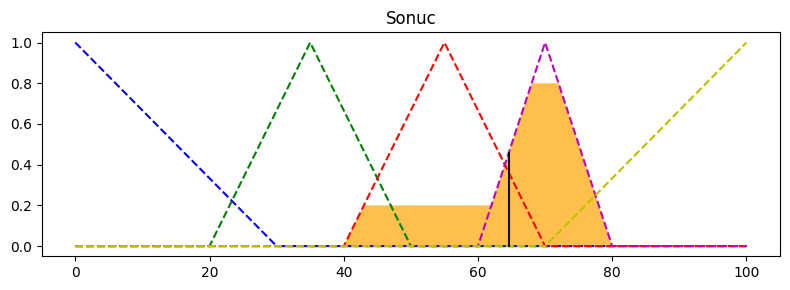

Bahsis_miktarı = 64.58024691358024 TL


In [27]:
fig, ax4 = plt.subplots(figsize=(8,3))

ax4.plot(bahsis, BCK, 'b', linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BK, 'g',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BO, 'r',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BI, 'm',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BCI, 'y', linewidth=1.5, linestyle='--')

ax4.fill_between(bahsis, ctr0, toplanan_kurallar, facecolor='orange', alpha=0.7)
ax4.plot([durulama_islemi, durulama_islemi], [0, islem_sonucu], 'k', linewidth=1.5, alpha=0.9)
ax4.set_title('Sonuc')
plt.tight_layout()
plt.show()

print("Bahsis_miktarı =", durulama_islemi, "TL")